In [13]:
%cd /storage/lab/solar-energy-prediction/

/storage/lab/solar-energy-prediction


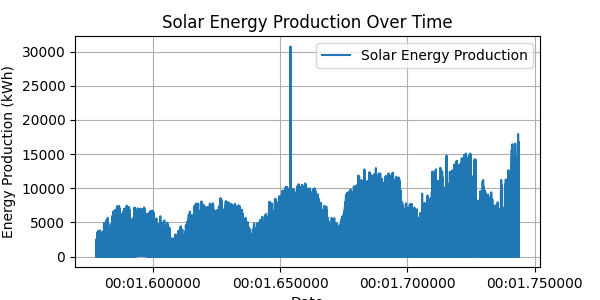

In [14]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


solar_data = pd.read_csv("data/energy/SOLAR.csv", index_col=0)
solar_data.head()
solar_data['datetime'] = pd.to_datetime(solar_data['end'])
plt.figure(figsize=(6, 3))
plt.plot(solar_data['datetime'], solar_data['values'], label='Solar Energy Production')
plt.title('Solar Energy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend()
plt.grid()
plt.show()

Index(['datetime', 'timestamp', 'station', 'station_name',
       'direct_normal_irradiance', 'cloud_cover', 'sunshine_duration',
       'precipitation', 'surface_pressure', 'relative_humidity_2m',
       'temperature_2m', 'wind_speed_10m', 'shortwave_radiation'],
      dtype='object')


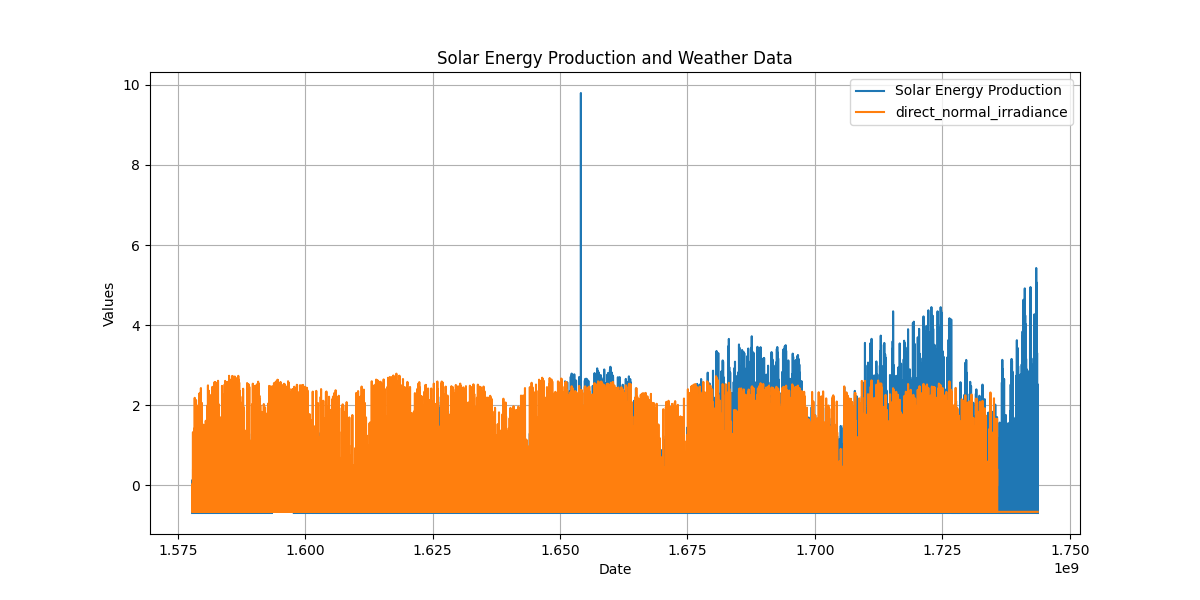

In [26]:
weather_data = pd.read_csv("data/raw/weather/lyon_hourly.csv")

print(weather_data.columns)
fused_data = pd.merge_asof(
    solar_data.sort_values('datetime'),
    weather_data.sort_values('datetime'),
    left_on='end',
    right_on='timestamp',
    direction='backward')


variables = ['direct_normal_irradiance', 'values']

normalized_data = fused_data

normalized_data[variables] = (
    fused_data[variables] - fused_data[variables].mean()) / fused_data[variables].std()

plt.figure(figsize=(12, 6))
plt.plot(normalized_data['end'], normalized_data['values'],
         label='Solar Energy Production')
for predictor in variables:
    if predictor == 'values':
        continue
    plt.plot(normalized_data['end'],
             normalized_data[predictor], label=predictor)
plt.title('Solar Energy Production and Weather Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()